<a href="https://colab.research.google.com/github/xielun-laoshi/Whack-Web-2025/blob/main/Copy_of_WiDS_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

#### I imported the excel files and the MRI files seperately as `df_train/test` and `df_train/test_MRI`


In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%pip install openpyxl

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


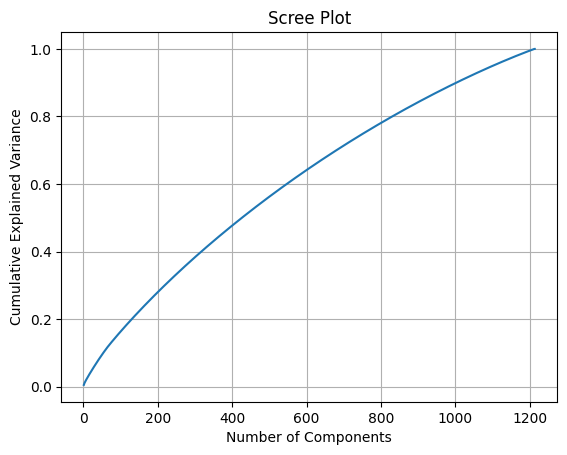

Optimal number of components: 1101
0.9503011705070166


In [28]:
# importing the cvs file
df_train_MRI = pd.read_csv("/content/drive/Shared drives/WiDS2025/Datasets/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")

# PCA MRI data

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

 # Drop the id column
features = df_train_MRI.drop(columns=['participant_id'])

# Assuming 'features' is your data
pca = PCA()  # Initialize PCA without specifying n_components
pca.fit(features)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot scree plot
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Choose the optimal number of components based on the plot
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Example: 95% variance
print(f"Optimal number of components: {optimal_n_components}")

# scale the data before applying pca
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components = 1103)
pca_components = pca.fit_transform(scaled_features)
df_train_MRI_PCA = pd.DataFrame(pca_components,  columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_train_MRI_PCA['participant_id'] = df_train_MRI['participant_id']
df_train_MRI_PCA.head()
print(pca.explained_variance_ratio_.sum())

In [29]:
# Importing the excel file
df_train_categorical = pd.read_excel("/content/drive/Shared drives/WiDS2025/Datasets/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx",engine ="openpyxl")
df_train_quantitative = pd.read_excel("/content/drive/Shared drives/WiDS2025/Datasets/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx", engine = "openpyxl")
df_train_solution = pd.read_excel("/content/drive/Shared drives/WiDS2025/Datasets/TRAIN/TRAINING_SOLUTIONS.xlsx", engine = "openpyxl")

# Create dummy varaibles for categorical data
print(df_train_categorical.head())

  participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   UmrK0vMLopoR                     2016                       1   
1   CPaeQkhcjg7d                     2019                       3   
2   Nb4EetVPm3gs                     2016                       1   
3   p4vPhVu91o4b                     2018                       3   
4   M09PXs7arQ5E                     2019                       3   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                            0   
1                               1.0                            2   
2                               1.0                            8   
3                               0.0                            8   
4                               0.0                            1   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        1                      21                      45   
1                   

In [30]:
print(df_train_categorical.columns[df_train_categorical.columns.duplicated()])
print(df_train_quantitative.columns[df_train_quantitative.columns.duplicated()])
print(df_train_solution.columns[df_train_solution.columns.duplicated()])
print(df_train_MRI_PCA.columns[df_train_MRI_PCA.columns.duplicated()])

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


In [31]:
# Merge these dataset together
df_train = pd.merge(df_train_categorical, df_train_quantitative, on="participant_id", how = "inner")
df_train = pd.merge(df_train,df_train_solution, on="participant_id", how = "inner")
df_train = pd.merge(df_train,df_train_MRI_PCA, on="participant_id", how = "inner")
print(df_train.head())
print(df_train.shape)

  participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   UmrK0vMLopoR                     2016                       1   
1   CPaeQkhcjg7d                     2019                       3   
2   Nb4EetVPm3gs                     2016                       1   
3   p4vPhVu91o4b                     2018                       3   
4   M09PXs7arQ5E                     2019                       3   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                            0   
1                               1.0                            2   
2                               1.0                            8   
3                               0.0                            8   
4                               0.0                            1   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        1                      21                      45   
1                   

In [32]:
df_train_categorical.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [33]:
df_train_quantitative.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

# Cleaning Data

### I removed missing data from the excel files

In [ ]:
# Data Cleaning I

%pip install scikit-learn
from sklearn.experimental import enable_iterative_imputer  # Enables IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

#count the number of time a missing data occurs
#nan_count = np.sum(df_train.isnull(), axis=0)
#nan_count

# Create the MICE imputer with Ridge as estimator
imputer = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0
)

# Fit and transform the data
df_id_columns = df_train['participant_id']
df_train = df_train.drop(columns=['participant_id'])
df_trian_imputed = imputer.fit_transform(df_train)

#store the names of the columns with detected missing values into a python list
#condition = nan_count != 0 #look for all columns with missing data
#ol_names = nan_count[condition].index #get the column names
#print(col_names)

#nan_cols = list(col_names) #convert column names into list
#print(nan_cols)

# Step 2: choose which value to fill
#nan_col_types = df_train[nan_cols].dtypes
#nan_col_types

# Step 3: create dummy variables for missing values
# df_train['Ethnicity_na'] = df_train['PreInt_Demos_Fam_Child_Ethnicity'].isnull()
# df_train['MRI_na'] = df_train['MRI_Track_Age_at_Scan'].isnull()
# df_train.head()

# Step 4: Fill missing value using pandas fillna() Method
#mean_Ethinicity = df_train['PreInt_Demos_Fam_Child_Ethnicity'].mean()
#mean_MRI = df_train['MRI_Track_Age_at_Scan'].mean()
#df_train['PreInt_Demos_Fam_Child_Ethnicity'] = df_train['PreInt_Demos_Fam_Child_Ethnicity'].fillna(mean_Ethinicity)
#df_train['MRI_Track_Age_at_Scan'] = df_train['MRI_Track_Age_at_Scan'].fillna(mean_MRI)
#df_train.head()

In [21]:
# Checking if missing data is replaced successfully
df_train.isnull().values.any()

np.False_

In [22]:
# Data Cleaning II

# Detecting and replacing outliers (Example: SDQ_SDQ_Prosocial)
df_train['SDQ_SDQ_Prosocial'].head()

Prosocial_999 = np.percentile(df_train['SDQ_SDQ_Prosocial'], 99.9)
print(Prosocial_999)

# Replace outliers
df_train['SDQ_SDQ_Prosocial'] = df_train['SDQ_SDQ_Prosocial'].replace(999, Prosocial_999)
df_train

# We can do further cleaning after we design which label to start with :)

10.0


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,...,PC1094,PC1095,PC1096,PC1097,PC1098,PC1099,PC1100,PC1101,PC1102,PC1103
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,...,1.473341,-2.341636,0.401777,-1.147885,-0.991695,-0.433995,0.611614,-0.691968,-0.436498,0.265673
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,...,-3.454688,-6.579606,-3.524900,2.098919,-0.334596,-0.602407,8.234615,2.861807,-6.050851,-3.327359
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,...,-0.920799,0.032962,-1.306160,1.324572,-3.670966,1.504438,0.770388,-0.904208,1.443721,-1.095675
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,...,-3.001534,-5.914567,-3.590970,0.633950,-4.149145,0.154686,-1.164516,0.907957,-1.108788,-3.184772
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,...,-0.431508,-0.840347,5.419392,2.279699,-0.286531,-0.221317,2.663301,0.881275,0.507105,-0.564102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,2019,1,0.0,0,2,21,40,21,40,...,-1.293340,5.595252,-2.034721,-1.255543,-6.578336,-0.746704,-10.177119,-2.994451,-1.267481,1.931029
1209,groSbUfkQngM,2016,1,0.0,0,1,18,35,0,0,...,1.303742,0.291239,3.754742,-1.947391,1.959253,1.014473,0.462741,1.280653,-0.679987,0.578022
1210,zmxGvIrOD0bt,2015,1,1.0,2,1,18,20,0,0,...,0.072180,-1.026959,1.340815,-1.632851,0.652821,-0.407793,0.094553,2.315050,-2.214784,0.035297
1211,rOmWFuJCud5G,2018,3,0.0,8,3,21,40,18,45,...,1.572205,-1.422749,7.128754,1.487079,-0.495843,-3.413832,-3.010522,-0.101779,2.014327,4.677283


# Evaluate performance

## Model 1: Random Forest

Sex Prediction Accuracy: 0.6565934065934066
Classification Report for Sex:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79       239
           1       0.50      0.01      0.02       125

    accuracy                           0.66       364
   macro avg       0.58      0.50      0.40       364
weighted avg       0.60      0.66      0.53       364

ADHD Prediction Accuracy: 0.7802197802197802
Classification Report for ADHD:
               precision    recall  f1-score   support

           0       0.83      0.32      0.47       108
           1       0.77      0.97      0.86       256

    accuracy                           0.78       364
   macro avg       0.80      0.65      0.66       364
weighted avg       0.79      0.78      0.74       364



In [ ]:
# define features (X)

X = df_train.drop(columns = ['participant_id', 'Sex_F', 'ADHD_Outcome'])

# train/test split for each target
from sklearn.model_selection import train_test_split

# Target 1: Predict Sex
y_sex = df_train['Sex_F']
X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(X, y_sex, test_size=0.3, random_state=42)

# Target 2: Predict ADHD Outcome
y_adhd = df_train['ADHD_Outcome']
X_train_adhd, X_test_adhd, y_train_adhd, y_test_adhd = train_test_split(X, y_adhd, test_size=0.3, random_state=42)

# Model training

from sklearn.ensemble import RandomForestClassifier

# Model 1: Sex
rf_sex = RandomForestClassifier(random_state=42)
rf_sex.fit(X_train_sex, y_train_sex)

# Model 2: ADHD
rf_adhd = RandomForestClassifier(random_state=42)
rf_adhd.fit(X_train_adhd, y_train_adhd)

# Evaluation

from sklearn.metrics import accuracy_score, classification_report

# Evaluate Sex Model
y_pred_sex = rf_sex.predict(X_test_sex)
print("Sex Prediction Accuracy:", accuracy_score(y_test_sex, y_pred_sex))
print("Classification Report for Sex:\n", classification_report(y_test_sex, y_pred_sex))

# Evaluate ADHD Model
y_pred_adhd = rf_adhd.predict(X_test_adhd)
print("ADHD Prediction Accuracy:", accuracy_score(y_test_adhd, y_pred_adhd))
print("Classification Report for ADHD:\n", classification_report(y_test_adhd, y_pred_adhd))

KeyboardInterrupt: 

## Model 2: Logistic Regression

Accuracy (Sex): 0.6483516483516484

In [ ]:
print(df_train.columns)

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ',
       ...
       'PC1091', 'PC1092', 'PC1093', 'PC1094', 'PC1095', 'PC1096', 'PC1097',
       'PC1098', 'PC1099', 'PC1100'],
      dtype='object', length=1130)


In [ ]:
# I want to specificaly pick out features including
  # Age at time of MRI scan: MRI_Track,Age_at_Scan
  # Scan Location: MRI_Track_Scan_Location
  # Parental information:
  # behavioral and emotional scores: SDQ_SDQ_Conduct_Problems,
    # SDQ_SDQ_Difficulties_Total, SDQ_SDQ_Emotional_Problems,
    # SDQ_SDQ_Externalizing, SDQ_SDQ_Generating_Impact, SDQ_SDQ_Hyperactivity,
    # SDQ_SDQ_Internalizing, SDQ_SDQ_Peer_Problems, SDQ_SDQ_Prosocial
    # APQ_P_APQ_P_CP, APQ_P_APQ_P_ID, APQ_P_APQ_P_INV, APQ_P_APQ_P_OPD,
    # APQ_P_APQ_P_PM, APQ_P_APQ_P_PP

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# selected_features = [
#     'MRI_Track_Scan_Location',
#     'SDQ_SDQ_Conduct_Problems','SDQ_SDQ_Difficulties_Total',
#     'SDQ_SDQ_Emotional_Problems',
#     'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
#     'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems',
#     'SDQ_SDQ_Prosocial',
#     'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD'
#   ]

selected_features = ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan']

X_selected = df_train[selected_features]


# Define the target variable
y = df_train["Sex_F"]

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

### feature selection for sex prediction

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
X = pd.get_dummies(X_selected, drop_first=True)
# Scale features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Create and train a model (using logistic regression as an example)
lr_model = LogisticRegressionCV(cv=5,
                                penalty='l1',
                                solver='saga',
                                max_iter=5000,
                                scoring='accuracy',
                                random_state=42,
                                n_jobs=-1)
lr_model.fit(X_scaled, y)

LogisticRegressionCV(cv=5, max_iter=5000, n_jobs=-1, penalty='l1',
                     random_state=42, scoring='accuracy', solver='saga')

In [ ]:
# Retrieve coefficients and associate them with feature names.
coef = lr_model.coef_.flatten()  # coefficients for each feature
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})

# Filter out features with zero coefficient (i.e. not selected by the model)
nonzero_coef_df = coef_df[coef_df['Coefficient'] != 0].copy()
nonzero_coef_df['AbsCoefficient'] = nonzero_coef_df['Coefficient'].abs()


In [ ]:

# Sort features by the absolute value of their coefficients (importance)
nonzero_coef_df = nonzero_coef_df.sort_values(by='AbsCoefficient', ascending=False)

print("Top Features for Sex Prediction (L1 regularized logistic regression):")
print(nonzero_coef_df[['Feature', 'Coefficient']].reset_index(drop=True))

Top Features for Sex Prediction (L1 regularized logistic regression):
                             Feature  Coefficient
0              SDQ_SDQ_Hyperactivity    -0.391973
1         SDQ_SDQ_Emotional_Problems     0.363235
2                  SDQ_SDQ_Prosocial     0.207473
3               ColorVision_CV_Score     0.201287
4             Barratt_Barratt_P2_Occ    -0.187092
5             Barratt_Barratt_P1_Occ     0.129257
6              MRI_Track_Age_at_Scan    -0.123739
7                    APQ_P_APQ_P_INV    -0.112397
8                     APQ_P_APQ_P_PP    -0.083098
9             Barratt_Barratt_P1_Edu     0.074602
10           MRI_Track_Scan_Location    -0.062957
11            Barratt_Barratt_P2_Edu     0.061728
12         SDQ_SDQ_Generating_Impact     0.054749
13           Basic_Demos_Enroll_Year    -0.050719
14  PreInt_Demos_Fam_Child_Ethnicity    -0.037109
15             SDQ_SDQ_Externalizing    -0.033420
16                    APQ_P_APQ_P_CP    -0.030196
17                   APQ_P_APQ

In [ ]:
selected_features_finals = ["SDQ_SDQ_Hyperactivity", "SDQ_SDQ_Emotional_Problems", "SDQ_SDQ_Prosocial", "ColorVision_CV_Score", "Barratt_Barratt_P2_Occ", "Barratt_Barratt_P1_Occ", "MRI_Track_Age_at_Scan", "APQ_P_APQ_P_INV", "APQ_P_APQ_P_PP"]

X_selected = df_train[selected_features_finals]


# Scale the selected features
from sklearn.preprocessing import StandardScaler
scaler_selected = StandardScaler()
X_selected_scaled = scaler_selected.fit_transform(X_selected)

In [ ]:
# Define the target for sex prediction
y_sex = df_train["Sex_F"]

# Split the data (train, validation, test) using the selected features
from sklearn.model_selection import train_test_split
X_train_sel, X_temp_sel, y_train_sel, y_temp_sel = train_test_split(
    X_selected_scaled, y_sex, test_size=0.3, stratify=y_sex, random_state=42)
X_val_sel, X_test_sel, y_val_sel, y_test_sel = train_test_split(
    X_temp_sel, y_temp_sel, test_size=0.5, stratify=y_temp_sel, random_state=42)


In [ ]:
# Train a logistic regression model on the selected features
from sklearn.linear_model import LogisticRegression
lr_final = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
lr_final.fit(X_train_sel, y_train_sel)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Evaluate on the test set
from sklearn.metrics import accuracy_score, classification_report
y_pred_sel = lr_final.predict(X_test_sel)
print("Final Logistic Regression Accuracy (selected features):", accuracy_score(y_test_sel, y_pred_sel))
print("Classification Report (selected features):\n", classification_report(y_test_sel, y_pred_sel))

Final Logistic Regression Accuracy (selected features): 0.6483516483516484
Classification Report (selected features):
               precision    recall  f1-score   support

           0       0.67      0.91      0.77       120
           1       0.45      0.15      0.22        62

    accuracy                           0.65       182
   macro avg       0.56      0.53      0.50       182
weighted avg       0.60      0.65      0.58       182



## Model 3: CNN


Classification Report for CNN Sex:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79       239
           1       0.00      0.00      0.00       125

    accuracy                           0.66       364
   macro avg       0.33      0.50      0.40       364
weighted avg       0.43      0.66      0.52       364


Classification Report for CNN ADHD:
               precision    recall  f1-score   support

           0       0.63      0.58      0.61       108
           1       0.83      0.86      0.84       256

    accuracy                           0.77       364
   macro avg       0.73      0.72      0.72       364
weighted avg       0.77      0.77      0.77       364

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Assume df_train is your original DataFrame with 1213 rows.
# Define your feature matrix and targets.
X = df_train.drop(columns=['participant_id', 'Sex_F', 'ADHD_Outcome'])
y_sex = df_train['Sex_F']
y_adhd = df_train['ADHD_Outcome']

# Perform a single train/test split on the indices.
train_idx, test_idx = train_test_split(X.index, test_size=0.3, random_state=42)

# Use the indices to split features and both targets.
X_train = X.loc[train_idx]
X_test  = X.loc[test_idx]

y_train_sex = y_sex.loc[train_idx]
y_test_sex  = y_sex.loc[test_idx]

y_train_adhd = y_adhd.loc[train_idx]
y_test_adhd  = y_adhd.loc[test_idx]


In [ ]:
from tensorflow.keras.layers import BatchNormalization

model_cnn = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Set up callbacks for learning rate scheduling and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3,
                              min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5,
                           restore_best_weights=True, verbose=1)


In [ ]:
# Model 1: Sex


# Train the CNN model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_cnn.fit(X, y_sex, epochs=50, batch_size=32, validation_split=0.2,
                        callbacks=[reduce_lr, early_stop])
# Evaluate the model on the test set
loss, accuracy = model_cnn.evaluate(X, y_sex)
print("CNN Model Accuracy:", accuracy)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.5417 - loss: 1.0064 - val_accuracy: 0.5350 - val_loss: 0.8403 - learning_rate: 0.0010
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.6298 - loss: 0.7172 - val_accuracy: 0.5556 - val_loss: 0.6864 - learning_rate: 0.0010
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6788 - loss: 0.6833 - val_accuracy: 0.5021 - val_loss: 0.7054 - learning_rate: 0.0010
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7230 - loss: 0.5631 - val_accuracy: 0.5432 - val_loss: 0.6995 - learning_rate: 0.0010
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7580 - loss: 0.5219
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.7578 - loss: 0.5218 - val_accuracy: 0.5350 - val_loss: 0.8192 - learning_rate: 0.0010
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.8156 - loss: 0.4263 - val_

In [ ]:
# Model 2: ADHD

# Train the CNN model
history = model_cnn.fit(X, y_adhd,
                        epochs=50, batch_size=32, validation_split=0.2,
                        callbacks=[reduce_lr, early_stop])



# Evaluate the model on the test set
loss, accuracy = model_cnn.evaluate(X, y_adhd)
print("CNN Model Accuracy:", accuracy)



Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.2903 - loss: 0.7557 - val_accuracy: 0.0000e+00 - val_loss: 0.7023 - learning_rate: 5.0000e-04
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8391 - loss: 0.5884 - val_accuracy: 0.0000e+00 - val_loss: 1.2044 - learning_rate: 5.0000e-04
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8656 - loss: 0.5250 - val_accuracy: 0.0000e+00 - val_loss: 1.3735 - learning_rate: 5.0000e-04
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8537 - loss: 0.4965
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.8536 - loss: 0.4962 - val_accuracy: 0.0000e+00 - val_loss: 1.6200 - learning_rate: 5.0000e-04
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8771 - loss: 0.4792 - val_accuracy: 0.0000e+00 - val_loss: 1.1024 - learning_rate: 2.5000e-04
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - a

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# from sklearn.metrics import accuracy_score, classification_report


# # Prepare data for CNN for Sex prediction:
# # Convert training and test sets to NumPy arrays and reshape them to (samples, features, 1)
# X_train_cnn_sex = X_train_sex.to_numpy().reshape((X_train_sex.shape[0], X_train_sex.shape[1], 1))
# X_test_cnn_sex  = X_test_sex.to_numpy().reshape((X_test_sex.shape[0],  X_test_sex.shape[1],  1))

In [ ]:
# # Build the 1D CNN model for Sex
# model_cnn_sex = Sequential([
#     Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn_sex.shape[1], 1)),
#     MaxPooling1D(pool_size=2),
#     Conv1D(filters=64, kernel_size=3, activation='relu'),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])


# model_cnn_sex.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

# # Train the CNN model
# model_cnn_sex.fit(X_train_cnn_sex, y_train_sex, epochs=10, batch_size=32, validation_split=0.2)

# # Evaluate the CNN model on the test set
# loss_sex, cnn_accuracy_sex = model_cnn_sex.evaluate(X_test_cnn_sex, y_test_sex)
# print("CNN Sex Model Accuracy:", cnn_accuracy_sex)

# # Get predictions and generate classification report (threshold predictions at 0.5)
# y_pred_cnn_sex = (model_cnn_sex.predict(X_test_cnn_sex) > 0.5).astype(int)
# print("Classification Report for CNN Sex:\n", classification_report(y_test_sex, y_pred_cnn_sex))

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 234ms/step - accuracy: 0.5238 - loss: 2.8760 - val_accuracy: 0.6882 - val_loss: 0.6598
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.6076 - loss: 0.7014 - val_accuracy: 0.6882 - val_loss: 0.6258
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.6460 - loss: 0.6607 - val_accuracy: 0.6882 - val_loss: 0.6277
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6793 - loss: 0.6444 - val_accuracy: 0.6882 - val_loss: 0.6586
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6759 - loss: 0.6570 - val_accuracy: 0.6882 - val_loss: 0.6274
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.6359 - loss: 0.6627 - val_accuracy: 0.6882 - val_loss: 0.6360
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.6896 - loss: 0.6174 - val_accuracy: 0.6882 - val_loss: 0.6385
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6504 - loss: 0.6383 - val_accuracy: 0.6882

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# from sklearn.model_selection import train_test_split

# # Assume df_train is your original DataFrame with 1213 rows.
# # Define your feature matrix and targets.
# X = df_train.drop(columns=['participant_id', 'Sex_F', 'ADHD_Outcome'])
# y_sex = df_train['Sex_F']
# y_adhd = df_train['ADHD_Outcome']

# # Perform a single train/test split on the indices.
# train_idx, test_idx = train_test_split(X.index, test_size=0.3, random_state=42)

# # Use the indices to split features and both targets.
# X_train = X.loc[train_idx]
# X_test  = X.loc[test_idx]

# y_train_sex = y_sex.loc[train_idx]
# y_test_sex  = y_sex.loc[test_idx]

# y_train_adhd = y_adhd.loc[train_idx]
# y_test_adhd  = y_adhd.loc[test_idx]

# # Verify the shapes:
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train_sex shape:", y_train_sex.shape)
# print("y_test_sex shape:", y_test_sex.shape)
# print("y_train_adhd shape:", y_train_adhd.shape)
# print("y_test_adhd shape:", y_test_adhd.shape)


X_train shape: (849, 1127)
X_test shape: (364, 1127)
y_train_sex shape: (849,)
y_test_sex shape: (364,)
y_train_adhd shape: (849,)
y_test_adhd shape: (364,)


In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# from sklearn.metrics import classification_report

# # Prepare ADHD data for CNN:
# # Convert X_train and X_test (for ADHD) to NumPy arrays and reshape them
# X_train_cnn_adhd = X_train.to_numpy().reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_cnn_adhd  = X_test.to_numpy().reshape((X_test.shape[0],  X_test.shape[1],  1))

# # Build the 1D CNN model for ADHD
# model_cnn_adhd = Sequential([
#     Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn_adhd.shape[1], 1)),
#     MaxPooling1D(pool_size=2),
#     Conv1D(filters=64, kernel_size=3, activation='relu'),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# model_cnn_adhd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the CNN model for ADHD prediction
# model_cnn_adhd.fit(X_train_cnn_adhd, y_train_adhd, epochs=10, batch_size=32, validation_split=0.2)

# # Evaluate the CNN model on the ADHD test set
# loss_adhd, cnn_accuracy_adhd = model_cnn_adhd.evaluate(X_test_cnn_adhd, y_test_adhd)
# print("CNN ADHD Model Accuracy:", cnn_accuracy_adhd)

# # Get predictions and generate classification report (threshold predictions at 0.5)
# y_pred_cnn_adhd = (model_cnn_adhd.predict(X_test_cnn_adhd) > 0.5).astype(int)
# print("Classification Report for CNN ADHD:\n", classification_report(y_test_adhd, y_pred_cnn_adhd))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.5944 - loss: 1.7601 - val_accuracy: 0.6647 - val_loss: 0.6333
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.6499 - loss: 0.6536 - val_accuracy: 0.6647 - val_loss: 0.5855
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.6805 - loss: 0.5926 - val_accuracy: 0.6824 - val_loss: 0.5762
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.6745 - loss: 0.5853 - val_accuracy: 0.6647 - val_loss: 0.5774
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.7058 - loss: 0.5548 - val_accuracy: 0.7529 - val_loss: 0.5281
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7017 - loss: 0.5546 - val_accuracy: 0.7118 - val_loss: 0.5155
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7458 - loss: 0.5105 - val_accuracy: 0.7647 - val_loss: 0.5162
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.7475 - loss: 0.4986 - val_accuracy: 0.7294 

## Model 4: Decision tree / Gradient boosting

XGBoost Sex Prediction Accuracy: 0.37637362637362637
Classification Report for XGBoost Sex:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79       239
           1       0.50      0.01      0.02       125

    accuracy                           0.66       364
   macro avg       0.58      0.50      0.40       364
weighted avg       0.60      0.66      0.53       364

XGBoost ADHD Prediction Accuracy: 0.7967032967032966
Classification Report for XGBoost ADHD:
               precision    recall  f1-score   support

           0       0.69      0.57      0.63       108
           1       0.83      0.89      0.86       256

    accuracy                           0.80       364
   macro avg       0.76      0.73      0.74       364
weighted avg       0.79      0.80      0.79       364

In [ ]:
# import pandas as pd
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# # Define features and targets (assuming df_train is already defined)
# X = df_train.drop(columns=['participant_id', 'Sex_F', 'ADHD_Outcome'])
# y_adhd = df_train['ADHD_Outcome']

# # Perform a single train/test split on the indices for consistency
# train_idx, test_idx = train_test_split(X.index, test_size=0.3, random_state=42)
# X_train_split = X.loc[train_idx]
# X_test_split = X.loc[test_idx]
# y_train_adhd = y_adhd.loc[train_idx]
# y_test_adhd = y_adhd.loc[test_idx]

In [ ]:
# # Define a parameter grid for XGBoost
# param_grid = {
#     'max_depth': [3, 4, 5, 6],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2]
# }

# # Initialize the XGBoost classifier
# xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

In [ ]:
# !pip install tqdm-joblib

# from tqdm import tqdm
# from tqdm_joblib import tqdm_joblib
# from sklearn.model_selection import ParameterGrid

# # Determine total number of candidate evaluations.
# # For cv=5, total evaluations = (number of parameter combinations) * 5.
# total_candidates = len(list(ParameterGrid(param_grid))) * 5

# with tqdm_joblib(tqdm(desc="GridSearchCV", total=total_candidates)) as progress_bar:
#     grid_search = GridSearchCV(estimator=xgb_model,
#                                param_grid=param_grid,
#                                cv=5,
#                                scoring='accuracy',
#                                verbose=0,  # optional: set verbose=0 when using tqdm
#                                n_jobs=-1)
#     grid_search.fit(X_train_split, y_train_adhd)

In [ ]:
# # Print the best parameters and best CV score
# print("Best Parameters:", grid_search.best_params_)
# print("Best CV Accuracy:", grid_search.best_score_)

# # Use the best estimator to predict on the test set
# best_model = grid_search.best_estimator_
# y_pred_adhd = best_model.predict(X_test_split)

# print("Test Accuracy (ADHD):", accuracy_score(y_test_adhd, y_pred_adhd))
# print("Classification Report for ADHD:\n", classification_report(y_test_adhd, y_pred_adhd))


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Define features and targets
X = df_train.drop(columns=['participant_id', 'Sex_F', 'ADHD_Outcome'])
y_sex = df_train['Sex_F']
y_adhd = df_train['ADHD_Outcome']

# Perform a single train/test split on the indices
train_idx, test_idx = train_test_split(X.index, test_size=0.3, random_state=42)

# Use the indices to split the features and both targets
X_train_split = X.loc[train_idx]
X_test_split = X.loc[test_idx]

y_train_sex = y_sex.loc[train_idx]
y_test_sex = y_sex.loc[test_idx]

y_train_adhd = y_adhd.loc[train_idx]
y_test_adhd = y_adhd.loc[test_idx]


In [ ]:
# Model 1: Sex using XGBoost
xgb_sex = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_sex.fit(X_train_sex, y_train_sex)

# Model 2: ADHD using XGBoost
xgb_adhd = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_adhd.fit(X_train_adhd, y_train_adhd)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Evaluate Sex Model
y_pred_sex = xgb_adhd.predict(X_test_sex)
print("XGBoost Sex Prediction Accuracy:", accuracy_score(y_test_sex, y_pred_sex))
print("Classification Report for XGBoost Sex:\n", classification_report(y_test_sex, y_pred_sex))

# Evaluate ADHD Model
y_pred_adhd = xgb_adhd.predict(X_test_split)
print("XGBoost ADHD Prediction Accuracy:", accuracy_score(y_test_adhd, y_pred_adhd))
print("Classification Report for XGBoost ADHD:\n", classification_report(y_test_adhd, y_pred_adhd))

XGBoost Sex Prediction Accuracy: 0.37637362637362637
Classification Report for XGBoost Sex:
               precision    recall  f1-score   support

           0       0.57      0.21      0.31       239
           1       0.31      0.69      0.43       125

    accuracy                           0.38       364
   macro avg       0.44      0.45      0.37       364
weighted avg       0.48      0.38      0.35       364

XGBoost ADHD Prediction Accuracy: 0.7967032967032966
Classification Report for XGBoost ADHD:
               precision    recall  f1-score   support

           0       0.69      0.57      0.63       108
           1       0.83      0.89      0.86       256

    accuracy                           0.80       364
   macro avg       0.76      0.73      0.74       364
weighted avg       0.79      0.80      0.79       364



## Model 4: Stacking

Stacking Ensemble ADHD Accuracy: 0.7967032967032966
Stacking Ensemble ADHD Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.56      0.62       108
           1       0.83      0.89      0.86       256

    accuracy                           0.80       364
   macro avg       0.76      0.73      0.74       364
weighted avg       0.79      0.80      0.79       364

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Define base learners for the stacking ensemble.
estimators = [
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)),
    ('rf', RandomForestClassifier(random_state=42))
]

# Create the stacking classifier with Logistic Regression as the meta-model.
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,          # 5-fold cross-validation for stacking
    n_jobs=-1
)

In [ ]:
# Fit the stacking model on the training data for ADHD.
stack_model.fit(X_train_split, y_train_adhd)

# Predict on the test set.
y_pred_stack = stack_model.predict(X_test_split)

# Evaluate the stacking ensemble.
print("Stacking Ensemble ADHD Accuracy:", accuracy_score(y_test_adhd, y_pred_stack))
print("Stacking Ensemble ADHD Classification Report:\n", classification_report(y_test_adhd, y_pred_stack))


Stacking Ensemble ADHD Accuracy: 0.7967032967032966
Stacking Ensemble ADHD Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.56      0.62       108
           1       0.83      0.89      0.86       256

    accuracy                           0.80       364
   macro avg       0.76      0.73      0.74       364
weighted avg       0.79      0.80      0.79       364



## Ensemble Model

Ensemble ADHD Accuracy: 0.7939560439560439
Ensemble ADHD Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.55      0.61       108
           1       0.82      0.90      0.86       256

    accuracy                           0.79       364
   macro avg       0.76      0.72      0.74       364
weighted avg       0.79      0.79      0.79       364

In [ ]:
# Get probability predictions for the ADHD target from each model
probs_xgb = xgb_adhd.predict_proba(X_test_split)[:, 1]  # shape: (n_samples,)
probs_rf = rf_adhd.predict_proba(X_test_split)[:, 1]      # shape: (n_samples,)
probs_cnn = model_cnn_adhd.predict(X_test_cnn_adhd).flatten()  # shape: (n_samples,)

# Combine predictions with equal weighting (you can adjust weights as needed)
ensemble_probs = (probs_xgb + probs_rf + probs_cnn) / 3.0

# Convert ensemble probabilities to binary predictions (threshold at 0.5)
ensemble_pred = (ensemble_probs > 0.5).astype(int)

# Evaluate the ensemble
print("Ensemble ADHD Accuracy:", accuracy_score(y_test_adhd, ensemble_pred))
print("Ensemble ADHD Classification Report:\n", classification_report(y_test_adhd, ensemble_pred))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Ensemble ADHD Accuracy: 0.7939560439560439
Ensemble ADHD Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.55      0.61       108
           1       0.82      0.90      0.86       256

    accuracy                           0.79       364
   macro avg       0.76      0.72      0.74       364
weighted avg       0.79      0.79      0.79       364



# Optimized Models [CNN/Gradient Boosting]

## Data Processing

In [ ]:

# Assume df_train is already provided as a DataFrame
# Verify the dataframe structure (optional):
print("Dataset shape:", df_train.shape)
print("Columns:", df_train.columns.tolist()[:10], "...")  # show some columns for sanity check

Dataset shape: (1213, 1130)
Columns: ['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ'] ...


In [ ]:
# Ensure target columns are binary-encoded
target_cols = ['ADHD_Outcome', 'Sex_F']
for col in target_cols:
    # If targets are not numeric (e.g., 'Yes'/'No' or 'M'/'F'), encode them as 0/1
    if df_train[col].dtype == object or str(df_train[col].dtype).startswith('category'):
        le = LabelEncoder()
        df_train[col] = le.fit_transform(df_train[co])
        print(f"Encoded {col} classes: {list(le.classes_)} -> {df_train[col].unique()}")

In [ ]:
# Separate features and target labels
X_df = df_train.drop(columns=target_cols)            # feature dataframe (PCA features + metadata)
y_ADHD = df_train['ADHD_Outcome'].values             # ADHD labels (numpy array)
y_Sex  = df_train['Sex_F'].values                   # Sex labels (numpy array, 1 = Female presumably)

In [ ]:
# One-hot encode categorical feature columns in X (if any)
X_df = pd.get_dummies(X_df, drop_first=True)        # convert categorical metadata to dummy vars
print("Total features after encoding:", X_df.shape[1])

Total features after encoding: 2339


In [ ]:
# Split into train, validation, and test sets (e.g., 70% train, 15% val, 15% test)
# Stratify on combined ADHD+Sex to maintain class balance for both labels
combined_labels = (y_ADHD.astype(str) + y_Sex.astype(str))  # e.g., "00", "01", "10", "11" for each sample
# First split: Train+Val vs Test
X_temp, X_test, y_ADHD_temp, y_ADHD_test, y_Sex_temp, y_Sex_test = train_test_split(
    X_df.values, y_ADHD, y_Sex, test_size=0.15, stratify=combined_labels, random_state=42)
# Second split: Train vs Val (from the temp set)
combined_labels_temp = (y_ADHD_temp.astype(str) + y_Sex_temp.astype(str))
X_train, X_val, y_ADHD_train, y_ADHD_val, y_Sex_train, y_Sex_val = train_test_split(
    X_temp, y_ADHD_temp, y_Sex_temp, test_size=0.1765, stratify=combined_labels_temp, random_state=42)

In [ ]:
# Report dataset sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Check label distribution in each set to ensure stratification worked
print("ADHD label distribution in Train/Val/Test:",
      np.mean(y_ADHD_train), np.mean(y_ADHD_val), np.mean(y_ADHD_test))
print("Sex (Female) label distribution in Train/Val/Test:",
      np.mean(y_Sex_train), np.mean(y_Sex_val), np.mean(y_Sex_test))

Training set size: 849 samples
Validation set size: 182 samples
Test set size: 182 samples
ADHD label distribution in Train/Val/Test: 0.6855123674911661 0.6813186813186813 0.6868131868131868
Sex (Female) label distribution in Train/Val/Test: 0.34275618374558303 0.34065934065934067 0.34615384615384615


## Inputing data from training data set

In [ ]:
# Train on the testing data sets

# Importing the excel file
df_test_categorical = pd.read_excel("/content/drive/Shared drives/WiDS2025/Datasets/TEST/TEST_CATEGORICAL.xlsx",engine ="openpyxl")
df_test_quantitative = pd.read_excel("/content/drive/Shared drives/WiDS2025/Datasets/TEST/TEST_QUANTITATIVE_METADATA.xlsx", engine = "openpyxl")
df_test_MRI = pd.read_csv("/content/drive/Shared drives/WiDS2025/Datasets/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")

In [ ]:
# Merging data sets
df_test = pd.merge(df_test_categorical, df_test_quantitative, on='participant_id')
df_test = pd.merge(df_test, df_test_MRI, on='participant_id')
df_test.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [ ]:
import numpy as np
import pandas as pd

# === Assume df_test is your raw test DataFrame ===

# --------------------------------------------------------
# Step 0: Standardize Missing Value Representations
# --------------------------------------------------------
# Replace empty strings or other placeholders with np.nan
df_test.replace("", np.nan, inplace=True)
# You can also replace other placeholders if necessary, e.g.,
# df_test.replace("NA", np.nan, inplace=True)

# --------------------------------------------------------
# Step 1: Inspect Missing Data
# --------------------------------------------------------
# Check overall missing data presence
print("Any missing data in test set?", df_test.isnull().values.any())

# Count missing values per column
nan_count = df_test.isnull().sum()
print("Missing value counts per column:\n", nan_count)

# List columns that have missing data
nan_cols = list(nan_count[nan_count != 0].index)
print("Columns with missing data:", nan_cols)

# --------------------------------------------------------
# Step 2: Fill Missing Values with Pre-computed Statistics
# --------------------------------------------------------
# For specific columns, use values computed from the training set.
# For example:
# (These values MUST be computed during training.)
# mean_Ethinicity = df_train['PreInt_Demos_Fam_Child_Ethnicity'].mean()
# mean_MRI = df_train['MRI_Track_Age_at_Scan'].mean()
# Prosocial_999 = np.percentile(df_train['SDQ_SDQ_Prosocial'], 99.9)

# Fill missing values for specific columns
df_test['PreInt_Demos_Fam_Child_Ethnicity'] = df_test['PreInt_Demos_Fam_Child_Ethnicity'].fillna(mean_Ethinicity)
df_test['MRI_Track_Age_at_Scan'] = df_test['MRI_Track_Age_at_Scan'].fillna(mean_MRI)

# Replace designated outlier values (e.g., 999) with the 99.9th percentile value computed on training data
df_test['SDQ_SDQ_Prosocial'] = df_test['SDQ_SDQ_Prosocial'].replace(999, Prosocial_999)

# --------------------------------------------------------
# Optional: Fill Remaining Missing Values
# --------------------------------------------------------
# For numeric columns not specifically handled, fill missing values with the column mean.
numeric_cols = df_test.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if df_test[col].isnull().any():
        df_test[col] = df_test[col].fillna(df_test[col].mean())

# For categorical columns, fill missing values with the most frequent value (mode).
categorical_cols = df_test.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if df_test[col].isnull().any():
        df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

# Verify that missing values have been handled
print("Missing values after fill:\n", df_test.isnull().sum())

# --------------------------------------------------------
# Step 3: One-Hot Encoding and Column Alignment
# --------------------------------------------------------
# Apply one-hot encoding using pd.get_dummies
df_test_encoded = pd.get_dummies(df_test, drop_first=True)
print("Encoded test data shape before alignment:", df_test_encoded.shape)

# To ensure the test set has the same features as the training set:
# Assume you saved the columns of your training set after encoding as "training_columns" during training.
# For example:
# training_columns = df_train_encoded.columns
df_test_encoded = df_test_encoded.reindex(columns=training_columns, fill_value=0)
print("Encoded test data shape after reindexing:", df_test_encoded.shape)

# --------------------------------------------------------
# Step 4: Convert to a NumPy Array for Modeling
# --------------------------------------------------------
X_test_processed = df_test_encoded.values

# Now X_test_processed is cleaned, encoded, and aligned for model predictions.
print("Final test features shape:", X_test_processed.shape)


Any missing data in test set? True
Missing value counts per column:
 participant_id                      0
Basic_Demos_Enroll_Year             0
Basic_Demos_Study_Site              0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         6
                                   ..
196throw_198thcolumn                0
196throw_199thcolumn                0
197throw_198thcolumn                0
197throw_199thcolumn                0
198throw_199thcolumn                0
Length: 19928, dtype: int64
Columns with missing data: ['PreInt_Demos_Fam_Child_Race', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ

In [ ]:
df_test.isnull().values.any()

np.False_

In [ ]:
# clean and proprocesing
# 1. Check for missing data
print("Any missing data in test set?", df_test.isnull().values.any())
nan_count_test = np.sum(df_test.isnull(), axis=0)
print("Missing value counts per column in test set:\n", nan_count_test)

# Get a list of columns with missing data
nan_cols_test = list(nan_count_test[nan_count_test != 0].index)
print("Columns with missing data in test set:", nan_cols_test)

# 2. Fill missing data using values computed on the training set:
df_test['PreInt_Demos_Fam_Child_Ethnicity'] = df_test['PreInt_Demos_Fam_Child_Ethnicity'].fillna(mean_Ethinicity)
df_test['MRI_Track_Age_at_Scan'] = df_test['MRI_Track_Age_at_Scan'].fillna(mean_MRI)

# 3. Replace outliers on a specific column (e.g., SDQ_SDQ_Prosocial)
df_test['SDQ_SDQ_Prosocial'] = df_test['SDQ_SDQ_Prosocial'].replace(999, Prosocial_999)

# 4. Verify basic info
print("Test dataset shape:", df_test.shape)
print("Test dataset columns (first 10):", df_test.columns.tolist()[:10], "...")


Any missing data in test set? True
Missing value counts per column in test set:
 participant_id                      0
Basic_Demos_Enroll_Year             0
Basic_Demos_Study_Site              0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         6
                                   ..
196throw_198thcolumn                0
196throw_199thcolumn                0
197throw_198thcolumn                0
197throw_199thcolumn                0
198throw_199thcolumn                0
Length: 19928, dtype: int64
Columns with missing data in test set: ['PreInt_Demos_Fam_Child_Race', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_

In [ ]:
# one-hot encoding and alignment


# In your training data you applied pd.get_dummies(drop_first=True).
df_test_encoded = pd.get_dummies(df_test, drop_first=True)
print("Total features after encoding in test set:", df_test_encoded.shape[1])

# Ensure the test set has the same columns as the training data by reindexing.
# Here, 'training_columns' should be defined during training as:
# training_columns = X_train_df.columns
df_test_encoded = df_test_encoded.reindex(columns=training_columns, fill_value=0)

# Convert the processed DataFrame to a NumPy array.
X_test_processed = df_test_encoded.values


Total features after encoding in test set: 20230


In [ ]:
df_train_encoded = pd.get_dummies(df_train, drop_first=True)
training_columns = df_train_encoded.columns  # Save these column names
X_train_processed = df_train_encoded.values


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)


In [ ]:
df_test_encoded = pd.get_dummies(df_test, drop_first=True)

# Reindex test DataFrame so that its columns match the training columns
df_test_encoded = df_test_encoded.reindex(columns=training_columns, fill_value=0)
print("Test features after reindexing:", df_test_encoded.shape)

X_test_processed = df_test_encoded.values


Test features after reindexing: (304, 2341)


In [ ]:
X_test_scaled = scaler.transform(X_test_processed)

## XGBoost for ADHD

XGBoost ADHD Model - Test Metrics:
1. Accuracy:  0.808
2. Precision: 0.821
3. Recall:    0.920
4. F1-score:  0.868

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare data for XGBoost (as numpy arrays)
X_train_xgb = X_train  # already a numpy array from the split
X_val_xgb   = X_val
X_test_xgb  = X_test

In [ ]:

# Define hyperparameter grid for XGBoost
param_grid = [
    {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1},
    {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01},
    {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1},
    {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01},
    {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1},
    {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01},
    {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1},
    {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01},
]

best_xgb_ADHD = None
best_params_ADHD = None
best_val_acc = 0.0

In [ ]:
print("Tuning XGBoost hyperparameters for ADHD prediction...")
for params in param_grid:
    model = XGBClassifier(eval_metric='logloss', random_state=42, **params)
    model.fit(X_train_xgb, y_ADHD_train,
              eval_set=[(X_val_xgb, y_ADHD_val)], verbose=False)
    # Evaluate on validation set
    val_pred = model.predict(X_val_xgb)
    val_acc = accuracy_score(y_ADHD_val, val_pred)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_params_ADHD = params
        best_xgb_ADHD = model

Tuning XGBoost hyperparameters for ADHD prediction...


In [ ]:
print(f"Best XGB params for ADHD: {best_params_ADHD}, Validation Accuracy: {best_val_acc:.2f}")

Best XGB params for ADHD: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}, Validation Accuracy: 0.79


In [ ]:
# Evaluate the best XGBoost model on the test set
y_pred_ADHD_xgb = best_xgb_ADHD.predict(X_test_xgb)
acc = accuracy_score(y_ADHD_test, y_pred_ADHD_xgb)
prec = precision_score(y_ADHD_test, y_pred_ADHD_xgb)
rec = recall_score(y_ADHD_test, y_pred_ADHD_xgb)
f1 = f1_score(y_ADHD_test, y_pred_ADHD_xgb)
print("XGBoost ADHD Model - Test Metrics:")
print(f"  Accuracy:  {acc:.3f}")
print(f"  Precision: {prec:.3f}")
print(f"  Recall:    {rec:.3f}")
print(f"  F1-score:  {f1:.3f}")

XGBoost ADHD Model - Test Metrics:
  Accuracy:  0.808
  Precision: 0.821
  Recall:    0.920
  F1-score:  0.868


In [ ]:
# After processing your training data:
training_columns = X_df.columns  # X_df is your one-hot encoded training DataFrame

# When processing your test set:
df_test_encoded = pd.get_dummies(df_test, drop_first=True)

# Align test set columns to match the training set columns, adding any missing columns with zeros:
df_test_encoded = df_test_encoded.reindex(columns=training_columns, fill_value=0)

# Now convert to NumPy array if necessary:
X_test_processed = df_test_encoded.values

predictions_xgb_adhd = best_xgb_ADHD.predict(X_test_processed)

## CNN Model for ADHD

CNN ADHD Model - Test Metrics:
1.  Accuracy:  0.802
2. Precision: 0.820
3. Recall:    0.912
4. F1-score:  0.864

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [ ]:
# Convert features to float32
X_train_cnn = X_train.astype('float32')
X_val_cnn   = X_val.astype('float32')
X_test_cnn  = X_test.astype('float32')

# Convert targets to float32 (or int, if appropriate)
y_ADHD_train = y_ADHD_train.astype('float32')
y_ADHD_val   = y_ADHD_val.astype('float32')
y_ADHD_test  = y_ADHD_test.astype('float32')

print("X_train_cnn dtype:", X_train_cnn.dtype)
print("y_ADHD_train dtype:", y_ADHD_train.dtype)

X_train_cnn dtype: float32
y_ADHD_train dtype: float32


In [ ]:
# Build 1D CNN model for ADHD
n_features = X_train_cnn.shape[1]
cnn_ADHD = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_features, 1), padding='same'),
    BatchNormalization(),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    GlobalAveragePooling1D(),              # compress feature maps to a single vector (64 features if 64 filters)
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')         # output layer for binary classification
])
cnn_ADHD.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the CNN model with early stopping and learning rate reduction
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

history = cnn_ADHD.fit(X_train_cnn, y_ADHD_train,
                       validation_data=(X_val_cnn, y_ADHD_val),
                       epochs=100, batch_size=32, callbacks=callbacks, verbose=1)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 295ms/step - accuracy: 0.6934 - loss: 0.6783 - val_accuracy: 0.6813 - val_loss: 0.6489 - learning_rate: 0.0010
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.6517 - loss: 0.6411 - val_accuracy: 0.6813 - val_loss: 0.6243 - learning_rate: 0.0010
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 280ms/step - accuracy: 0.6781 - loss: 0.6212 - val_accuracy: 0.6813 - val_loss: 0.6235 - learning_rate: 0.0010
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.6839 - loss: 0.6103 - val_accuracy: 0.6813 - val_loss: 0.6238 - learning_rate: 0.0010
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 391ms/step - accuracy: 0.6812 - loss: 0.6117 - val_accuracy: 0.6813 - val_loss: 0.6179 - learning_rate: 0.0010
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 301ms/step - accuracy: 0.6906 - loss: 0.5899 - val_accuracy: 0.6813 - val_loss: 0.6177 - learning_rate: 0.0010
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 325ms/step - accuracy: 0.6909 - loss

In [ ]:
print(X_test_cnn.dtype)
X_test_cnn = X_test.astype('float32')

object


In [ ]:
# Evaluate CNN model on test set
y_prob_ADHD_cnn = cnn_ADHD.predict(X_test_cnn)
y_pred_ADHD_cnn = (y_prob_ADHD_cnn >= 0.5).astype(int).reshape(-1)  # Convert probabilities to binary predictions (threshold = 0.5)

# Compute evaluation metrics
acc = accuracy_score(y_ADHD_test, y_pred_ADHD_cnn)
prec = precision_score(y_ADHD_test, y_pred_ADHD_cnn)
rec = recall_score(y_ADHD_test, y_pred_ADHD_cnn)
f1 = f1_score(y_ADHD_test, y_pred_ADHD_cnn)

print("CNN ADHD Model - Test Metrics:")
print(f"  Accuracy:  {acc:.3f}")
print(f"  Precision: {prec:.3f}")
print(f"  Recall:    {rec:.3f}")
print(f"  F1-score:  {f1:.3f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step
CNN ADHD Model - Test Metrics:
  Accuracy:  0.802
  Precision: 0.820
  Recall:    0.912
  F1-score:  0.864


## CNN model & XGBoost for Sex

XGBoost Sex Model - Test Metrics:
1. Accuracy:  0.632
2. Precision: 0.400
3. Recall:    0.127
4. F1-score:  0.193

CNN Model - Test Metrics:
1. Accuracy:  0.654
2. Precision: 0.000
3. Recall:    0.000
4. F1-score:  0.000

In [ ]:
# Prepare data (already prepared above as X_train, etc.)
X_train_xgb = X_train  # features are the same split, targets differ
X_val_xgb   = X_val
X_test_xgb  = X_test

best_xgb_sex = None
best_params_sex = None
best_val_acc = 0.0

print("Tuning XGBoost hyperparameters for Sex prediction...")
for params in param_grid:
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **params)
    model.fit(X_train_xgb, y_Sex_train,
              eval_set=[(X_val_xgb, y_Sex_val)], verbose=False)
    val_pred = model.predict(X_val_xgb)
    val_acc = accuracy_score(y_Sex_val, val_pred)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_params_sex = params
        best_xgb_sex = model

print(f"Best XGB params for Sex: {best_params_sex}, Validation Accuracy: {best_val_acc:.2f}")

# Evaluate the best XGBoost model on the test set for Sex
y_pred_sex_xgb = best_xgb_sex.predict(X_test_xgb)
acc = accuracy_score(y_Sex_test, y_pred_sex_xgb)
prec = precision_score(y_Sex_test, y_pred_sex_xgb)
rec = recall_score(y_Sex_test, y_pred_sex_xgb)
f1 = f1_score(y_Sex_test, y_pred_sex_xgb)
print("XGBoost Sex Model - Test Metrics:")
print(f"  Accuracy:  {acc:.3f}")
print(f"  Precision: {prec:.3f}")
print(f"  Recall:    {rec:.3f}")
print(f"  F1-score:  {f1:.3f}")

Tuning XGBoost hyperparameters for Sex prediction...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:10:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:10:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:11:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:11:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:11:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best XGB params for Sex: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}, Validation Accuracy: 0.69
XGBoost Sex Model - Test Metrics:
  Accuracy:  0.632
  Precision: 0.400
  Recall:    0.127
  F1-score:  0.193


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure that X_train, X_val, X_test and y_Sex_train, y_Sex_val, y_Sex_test are numeric
# If these variables are pandas DataFrames/Series, convert them to NumPy arrays and cast appropriately.
# (Remove .to_numpy() if already NumPy arrays.)
X_train = X_train.astype('float32')
X_val   = X_val.astype('float32')
X_test  = X_test.astype('float32')
y_Sex_train = y_Sex_train.astype('float32')
y_Sex_val   = y_Sex_val.astype('float32')
y_Sex_test  = y_Sex_test.astype('float32')

print("X_train dtype:", X_train.dtype)
print("y_Sex_train dtype:", y_Sex_train.dtype)

# Prepare data for CNN by adding a channel dimension
X_train_cnn = np.expand_dims(X_train, axis=2)  # shape: (samples, features, 1)
X_val_cnn   = np.expand_dims(X_val, axis=2)
X_test_cnn  = np.expand_dims(X_test, axis=2)

# Build 1D CNN model for Sex prediction
n_features = X_train_cnn.shape[1]
cnn_sex = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(n_features, 1), padding='same'),
    BatchNormalization(),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_sex.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
cnn_sex.summary()

# Define callbacks for early stopping and learning rate reduction
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
]
# Train the CNN model for Sex prediction
history = cnn_sex.fit(X_train_cnn, y_Sex_train,
                      validation_data=(X_val_cnn, y_Sex_val),
                      epochs=100, batch_size=32, callbacks=callbacks, verbose=1)

# Evaluate CNN model on test set for Sex prediction
y_prob_sex_cnn = cnn_sex.predict(X_test_cnn)
y_pred_sex_cnn = (y_prob_sex_cnn >= 0.5).astype(int).reshape(-1)  # threshold at 0.5

acc = accuracy_score(y_Sex_test, y_pred_sex_cnn)
prec = precision_score(y_Sex_test, y_pred_sex_cnn)
rec = recall_score(y_Sex_test, y_pred_sex_cnn)
f1 = f1_score(y_Sex_test, y_pred_sex_cnn)

print("CNN Sex Model - Test Metrics:")
print(f"  Accuracy:  {acc:.3f}")
print(f"  Precision: {prec:.3f}")
print(f"  Recall:    {rec:.3f}")
print(f"  F1-score:  {f1:.3f}")


X_train dtype: float32
y_Sex_train dtype: float32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2339, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2339, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2339, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2339, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,945 (42.75 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 407ms/step - accuracy: 0.6190 - loss: 0.6844 - val_accuracy: 0.6593 - val_loss: 0.6596 - learning_rate: 0.0010
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 673ms/step - accuracy: 0.6788 - loss: 0.6428 - val_accuracy: 0.6593 - val_loss: 0.6421 - learning_rate: 0.0010
Epoch 3/100
 6/27 ━━━━━━━━━━━━━━━━━━━━ 8s 402ms/step - accuracy: 0.6730 - loss: 0.6427

KeyboardInterrupt: 

In [ ]:
# combining AHDH predictions with original features

import numpy as np

ADHD_proba_train = best_xgb_ADHD.predict_proba(X_train_xgb)[:, 1]
ADHD_proba_val   = best_xgb_ADHD.predict_proba(X_val_xgb)[:, 1]
ADHD_proba_test  = best_xgb_ADHD.predict_proba(X_test_xgb)[:, 1]

# Assuming X_train, X_val, and X_test are your feature arrays used for the CNN,
# and they are of shape (n_samples, n_features).
X_train_stack = np.concatenate([X_train, ADHD_proba_train.reshape(-1, 1)], axis=1)
X_val_stack   = np.concatenate([X_val, ADHD_proba_val.reshape(-1, 1)], axis=1)
X_test_stack  = np.concatenate([X_test, ADHD_proba_test.reshape(-1, 1)], axis=1)

# Ensure the data is in float32 format
X_train_stack = X_train_stack.astype('float32')
X_val_stack   = X_val_stack.astype('float32')
X_test_stack  = X_test_stack.astype('float32')

# Add a channel dimension (last dimension)
X_train_cnn = np.expand_dims(X_train_stack, axis=2)  # New shape: (samples, n_features+1, 1)
X_val_cnn   = np.expand_dims(X_val_stack, axis=2)
X_test_cnn  = np.expand_dims(X_test_stack, axis=2)


In [ ]:
n_features_new = X_train_cnn.shape[1]  # This is n_features+1 now.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Build the CNN model with updated input shape
cnn_sex = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(n_features_new, 1), padding='same'),
    BatchNormalization(),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_sex.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
cnn_sex.summary()

# Define callbacks for training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
]

# Train the CNN model on the stacked features
history = cnn_sex.fit(X_train_cnn, y_Sex_train,
                      validation_data=(X_val_cnn, y_Sex_val),
                      epochs=100,
                      batch_size=32,
                      callbacks=callbacks,
                      verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 2340, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2340, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 2340, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2340, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,945 (42.75 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 357ms/step - accuracy: 0.6264 - loss: 0.6855 - val_accuracy: 0.6593 - val_loss: 0.6673 - learning_rate: 0.0010
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 454ms/step - accuracy: 0.6764 - loss: 0.6484 - val_accuracy: 0.6593 - val_loss: 0.6415 - learning_rate: 0.0010
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 0.6451 - loss: 0.6556 - val_accuracy: 0.6593 - val_loss: 0.6415 - learning_rate: 0.0010
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 251ms/step - accuracy: 0.6746 - loss: 0.6359 - val_accuracy: 0.6593 - val_loss: 0.6419 - learning_rate: 0.0010
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.6588 - loss: 0.6422 - val_accuracy: 0.6593 - val_loss: 0.6431 - learning_rate: 0.0010
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.6622 - loss: 0.6466 - val_accuracy: 0.6593 - val_loss: 0.6437 - learning_rate: 0.0010
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.6598 - los

In [ ]:
# evaluate accuracy:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict using the updated CNN model
y_prob_sex_cnn = cnn_sex.predict(X_test_cnn)
y_pred_sex_cnn = (y_prob_sex_cnn >= 0.5).astype(int).reshape(-1)

# Calculate evaluation metrics
acc  = accuracy_score(y_Sex_test, y_pred_sex_cnn)
prec = precision_score(y_Sex_test, y_pred_sex_cnn)
rec  = recall_score(y_Sex_test, y_pred_sex_cnn)
f1   = f1_score(y_Sex_test, y_pred_sex_cnn)

print("CNN Sex Model (with ADHD stacking) - Test Metrics:")
print(f"  Accuracy:  {acc:.3f}")
print(f"  Precision: {prec:.3f}")
print(f"  Recall:    {rec:.3f}")
print(f"  F1-score:  {f1:.3f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
CNN Sex Model (with ADHD stacking) - Test Metrics:
  Accuracy:  0.654
  Precision: 0.000
  Recall:    0.000
  F1-score:  0.000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Compile test data for submission

In [ ]:
# adhd prediction
predictions_xgb_adhd = best_xgb_ADHD.predict(X_test_processed)

In [ ]:

# Assume df_train is your DataFrame with participant_id, Sex_F, ADHD_Outcome plus features.
# Drop unnecessary columns:
X_full = df_train.drop(columns=['participant_id', 'Sex_F', 'ADHD_Outcome'])
y_sex = df_train['Sex_F']

# (Optional) Do any cleaning on df_train here and also perform one-hot encoding.
df_train_encoded = pd.get_dummies(X_full, drop_first=True)

# Save the training columns for later test reindexing.
training_columns = df_train_encoded.columns

# Convert to NumPy array.
X_train_processed = df_train_encoded.values

# If you plan to use a CNN, you need to add a channel dimension.
# For example, if X_train_processed.shape = (n_samples, n_features), then:
X_train_cnn = np.expand_dims(X_train_processed, axis=2)  # shape: (n_samples, n_features, 1)

# Build CNN model with input_shape based on training data.
model_cnn = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_processed.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model on training data.
history = model_cnn.fit(X_train_cnn, y_sex, epochs=50, batch_size=32, validation_split=0.2)

# ----------------------------
# Test Phase
# ----------------------------

# Assume df_test is your new test DataFrame that needs to be processed similarly.
# (Perform cleaning, filling missing data, etc. on df_test as required.)
# Example cleaning is shown below.

# --- Data Cleaning ---
# Replace empty strings with np.nan
df_test.replace("", np.nan, inplace=True)

# Fill missing values (example: using precomputed statistics from training data)
df_test['PreInt_Demos_Fam_Child_Ethnicity'] = df_test['PreInt_Demos_Fam_Child_Ethnicity'].fillna(mean_Ethinicity)
df_test['MRI_Track_Age_at_Scan'] = df_test['MRI_Track_Age_at_Scan'].fillna(mean_MRI)

# Replace outliers with a computed threshold
df_test['SDQ_SDQ_Prosocial'] = df_test['SDQ_SDQ_Prosocial'].replace(999, Prosocial_999)

# (Optional) Fill any remaining missing numeric columns with their mean
numeric_cols = df_test.select_dtypes(include=['number']).columns
for col in numeric_cols:
    df_test[col] = df_test[col].fillna(df_test[col].mean())

# --- One-Hot Encoding and Alignment ---
df_test_encoded = pd.get_dummies(df_test, drop_first=True)
# IMPORTANT: Align with training feature columns:
df_test_encoded = df_test_encoded.reindex(columns=training_columns, fill_value=0)
print("Test encoded shape:", df_test_encoded.shape)  # Should match training: (n_samples, n_features)

# Convert to NumPy array.
X_test_processed = df_test_encoded.values

# Add the channel dimension as done for training.
X_test_cnn = np.expand_dims(X_test_processed, axis=2)  # shape: (n_samples, n_features, 1)

# ----------------------------
# Prediction Phase
# ----------------------------

# Use the CNN model to predict sex on the test set.
predictions_cnn_sex = model_cnn.predict(X_test_cnn)
# Optionally, convert probabilities to binary labels (e.g., threshold at 0.5).
predicted_labels = (predictions_cnn_sex >= 0.5).astype(int)
print("Predicted Sex Labels:", predicted_labels)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 37s 176ms/step - accuracy: 0.4981 - loss: 1.0023 - val_accuracy: 0.5926 - val_loss: 0.6852
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.6022 - loss: 0.7287 - val_accuracy: 0.5350 - val_loss: 0.8087
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 225ms/step - accuracy: 0.6832 - loss: 0.6513 - val_accuracy: 0.5309 - val_loss: 0.7709
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 0.7584 - loss: 0.5135 - val_accuracy: 0.5309 - val_loss: 0.7136
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - accuracy: 0.7926 - loss: 0.4829 - val_accuracy: 0.5473 - val_loss: 0.6883
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.8495 - loss: 0.3908 - val_accuracy: 0.5350 - val_loss: 0.7981
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.8244 - loss: 0.4249 - val_accuracy: 0.5391 - val_loss: 0.7680
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.8784 - loss: 0.2937 - val_accuracy:

In [ ]:
predicted_labels = predicted_labels.reshape(-1)

In [ ]:
# Format for submission
submission = pd.DataFrame({
    "participant_id": df_test["participant_id"],
    "ADHD_Outcome": predictions_xgb_adhd,
    "Sex_F": predicted_labels
})

# Save CSV to the current working directory in Colab
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv is ready!")

✅ submission.csv is ready!
